In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for plot visualization

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, LogisticRegression, LogisticRegressionCV

In [4]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import re

import warnings
# ignoring all the warnings
warnings.filterwarnings("ignore")

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [190]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [22]:
!pip install ml-utils

In [28]:
!pip install python_utils

In [29]:
import warnings
warnings.filterwarnings("ignore")
from python_utils import *

In [146]:
df = pd.read_csv('results_province_water.csv')

In [7]:
df.head()

,gid_1,name_1,iso_a3,iso_n3,name_0,score,score_ranked,cat,label,sum_weights,sum_weighted_indicator,count_valid,fraction_valid,un_region,wb_region,population_2019_million
0,AFG.2_1,Badghis,AFG,4,Afghanistan,5.0,1,4,Extremely_High,690.095871,3450.479353,29790,1.000000,Asia,South Asia,37.209007
1,BWA.4_1,Gaborone,BWA,72,Botswana,5.0,1,4,Extremely_High,8.769247,43.846234,401,1.000000,Africa,Sub-Saharan Africa,2.374636
2,BWA.6_1,Jwaneng,BWA,72,Botswana,5.0,1,4,Extremely_High,0.105124,0.525620,26,1.000000,Africa,Sub-Saharan Africa,2.374636
3,DJI.3_1,Djibouti,DJI,262,Djibouti,5.0,1,4,Extremely_High,5.514121,27.570607,1029,1.000000,Africa,Middle East & North Africa,0.985690
4,ECU.9_1,Galápagos,ECU,218,Ecuador,5.0,1,4,Extremely_High,0.545693,2.728464,10154,0.974887,Americas,Latin America & Caribbean,17.100444


In [10]:
df.describe()

,iso_n3,score,score_ranked,cat,sum_weights,sum_weighted_indicator,count_valid,fraction_valid,population_2019_million
count,3031.000000,3031.000000,3031.000000,3031.000000,3.031000e+03,3.031000e+03,3.031000e+03,3031.000000,3031.000000
mean,472.227978,1.670851,1459.752227,1.294952,1.861908e+03,5.035799e+03,7.820883e+04,0.997951,77.410749
std,260.136279,1.618228,797.688955,1.445411,9.826708e+03,4.027885e+04,3.528781e+05,0.022769,206.243902
min,4.000000,0.000000,1.000000,0.000000,4.030000e-09,0.000000e+00,1.000000e+01,0.614896,0.033683
25%,231.500000,0.030000,758.500000,0.000000,2.689617e+01,1.387473e+00,3.792500e+03,0.999944,6.981981
50%,484.000000,1.280000,1516.000000,1.000000,1.920918e+02,1.282879e+02,1.159500e+04,1.000000,21.018859
75%,704.000000,2.845000,2273.500000,2.000000,9.735669e+02,1.590029e+03,4.431050e+04,1.000000,69.306160
max,894.000000,5.000000,2448.000000,4.000000,3.875067e+05,1.608555e+06,8.856862e+06,1.479928,1420.062022


In [11]:
df.dtypes

gid_1                       object
name_1                      object
iso_a3                      object
iso_n3                       int64
name_0                      object
score                      float64
score_ranked                 int64
cat                          int64
label                       object
sum_weights                float64
sum_weighted_indicator     float64
count_valid                  int64
fraction_valid             float64
un_region                   object
wb_region                   object
population_2019_million    float64
dtype: object

In [18]:
df.corr()

,iso_n3,score,score_ranked,cat,sum_weights,sum_weighted_indicator,count_valid,fraction_valid,population_2019_million
iso_n3,1.000000,0.053821,-0.064705,0.054630,0.007364,0.000265,-0.073122,-0.006141,-0.061461
score,0.053821,1.000000,-0.986080,0.982356,0.121061,0.148853,-0.018306,0.054129,0.043347
score_ranked,-0.064705,-0.986080,1.000000,-0.955632,-0.122554,-0.141027,0.006984,-0.057041,-0.049856
cat,0.054630,0.982356,-0.955632,1.000000,0.120679,0.153122,-0.029128,0.050260,0.033790
sum_weights,0.007364,0.121061,-0.122554,0.120679,1.000000,0.970836,0.119568,0.008092,0.371656
sum_weighted_indicator,0.000265,0.148853,-0.141027,0.153122,0.970836,1.000000,0.063672,0.007476,0.304028
count_valid,-0.073122,-0.018306,0.006984,-0.029128,0.119568,0.063672,1.000000,-0.027951,0.121613
fraction_valid,-0.006141,0.054129,-0.057041,0.050260,0.008092,0.007476,-0.027951,1.000000,-0.007010
population_2019_million,-0.061461,0.043347,-0.049856,0.033790,0.371656,0.304028,0.121613,-0.007010,1.000000


In [33]:
features = []

In [42]:
corr_matrix = df.corr().abs()

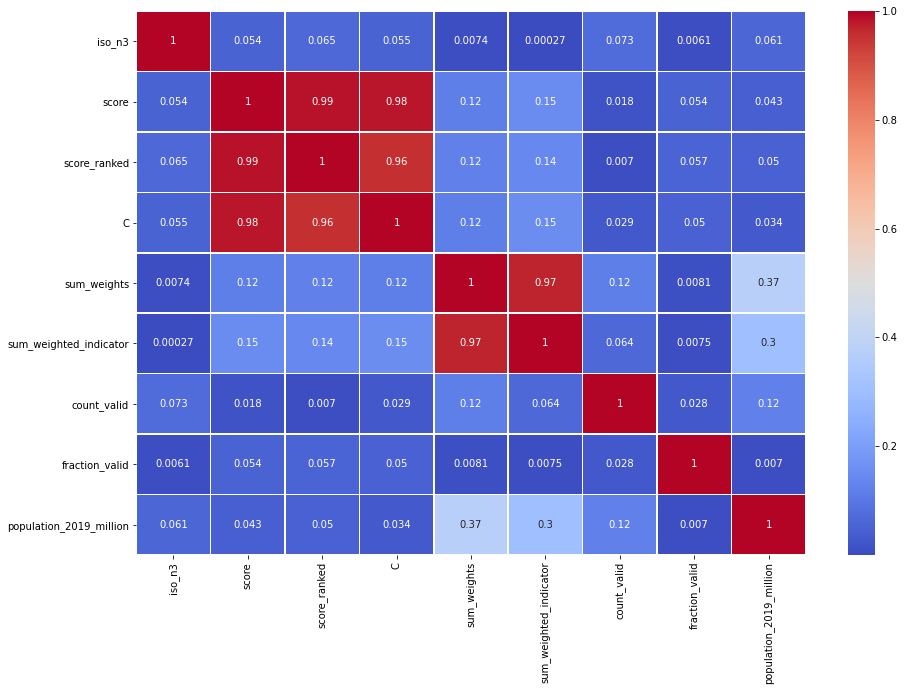

In [170]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 10)) 
heatmap = sns.heatmap(corr_matrix,linewidths = .5,cmap="coolwarm",annot=True)

<AxesSubplot:xlabel='un_region', ylabel='count'>

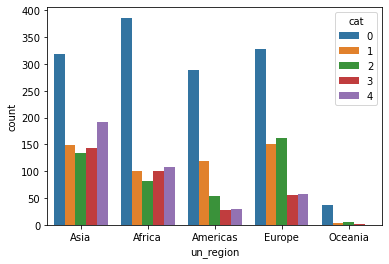

In [48]:
sns.countplot(x='un_region', data=df,hue='cat')

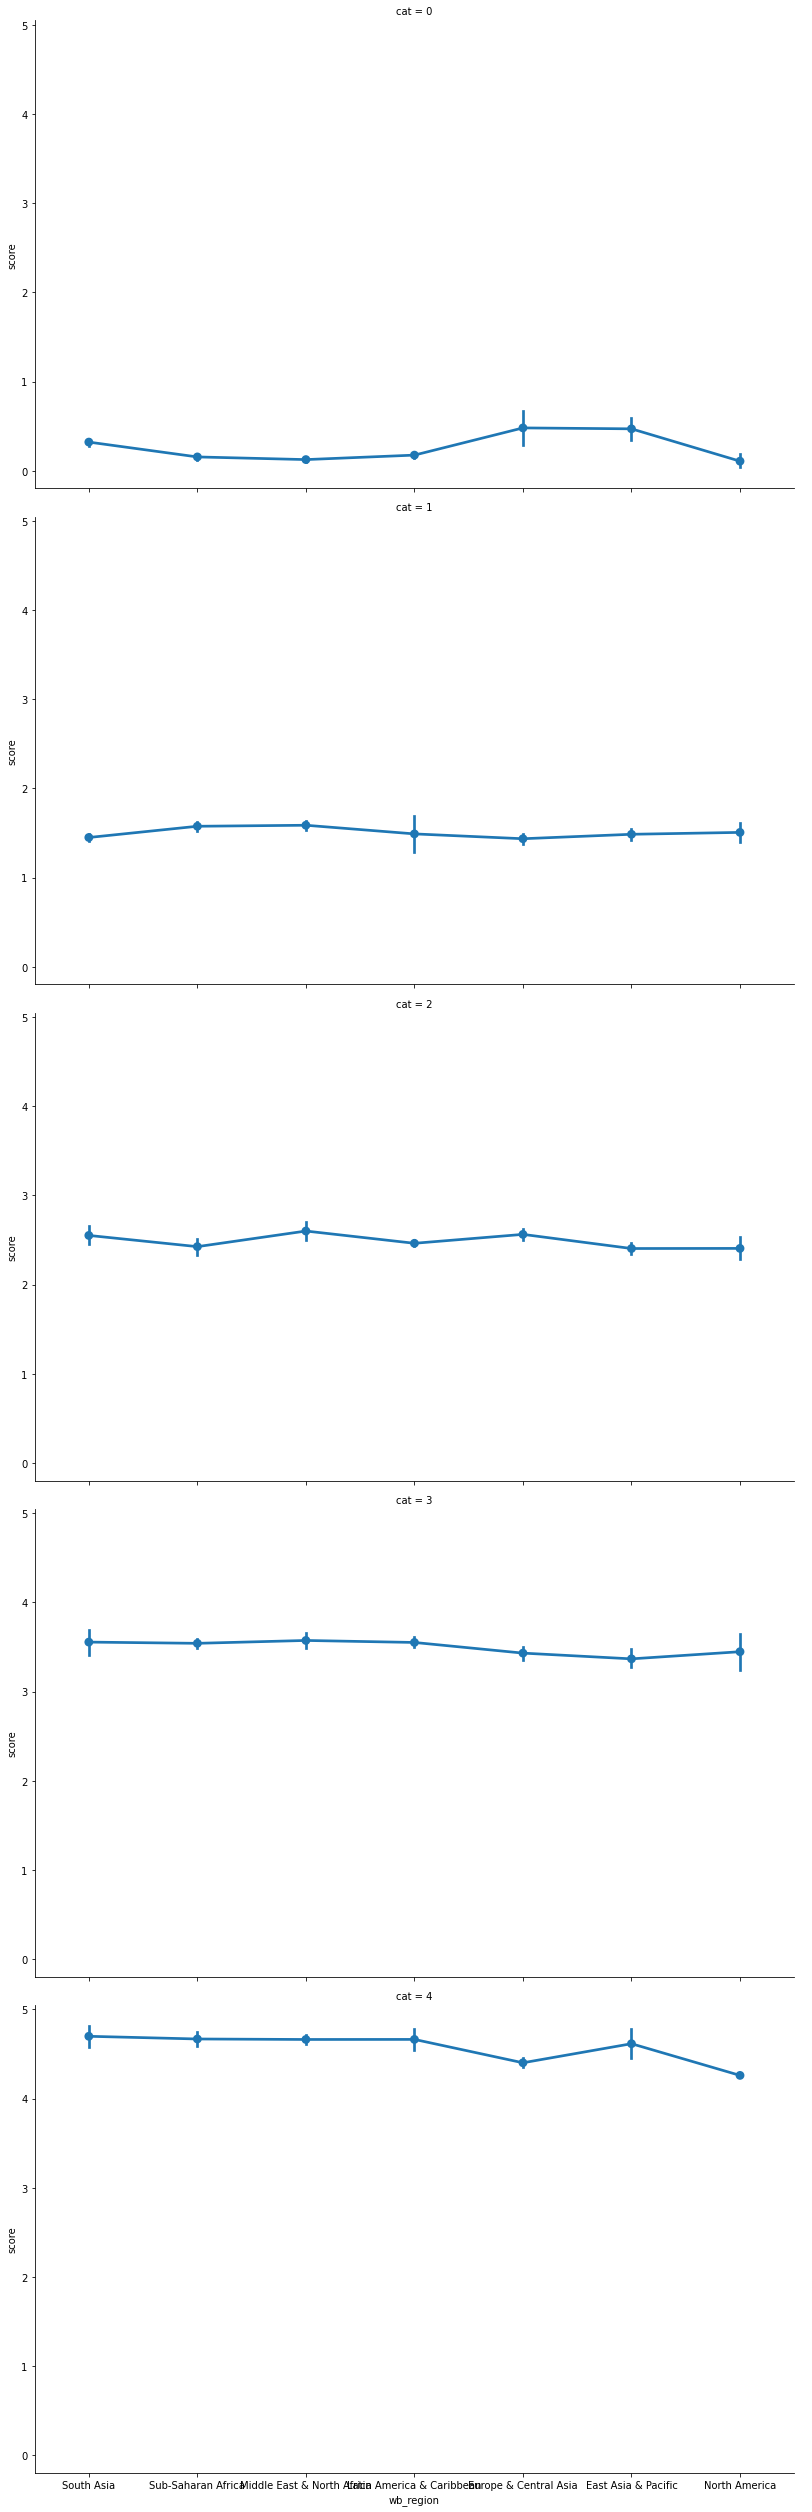

In [55]:
FacetGrid = sns.FacetGrid(df, row='cat', size=7.0, aspect=1.6)
FacetGrid.map(sns.pointplot, 'wb_region', 'score', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [118]:
df.columns

Index(['gid_1', 'name_1', 'iso_a3', 'iso_n3', 'name_0', 'score',
       'score_ranked', 'cat', 'label', 'sum_weights', 'sum_weighted_indicator',
       'count_valid', 'fraction_valid', 'un_region', 'wb_region',
       'population_2019_million'],
      dtype='object')

In [119]:
df.head()

,gid_1,name_1,iso_a3,iso_n3,name_0,score,score_ranked,cat,label,sum_weights,sum_weighted_indicator,count_valid,fraction_valid,un_region,wb_region,population_2019_million
0,AFG.2_1,Badghis,AFG,4,Afghanistan,5.0,1,4,Extremely_High,690.095871,3450.479353,29790,1.000000,Asia,South Asia,37.209007
1,BWA.4_1,Gaborone,BWA,72,Botswana,5.0,1,4,Extremely_High,8.769247,43.846234,401,1.000000,Africa,Sub-Saharan Africa,2.374636
2,BWA.6_1,Jwaneng,BWA,72,Botswana,5.0,1,4,Extremely_High,0.105124,0.525620,26,1.000000,Africa,Sub-Saharan Africa,2.374636
3,DJI.3_1,Djibouti,DJI,262,Djibouti,5.0,1,4,Extremely_High,5.514121,27.570607,1029,1.000000,Africa,Middle East & North Africa,0.985690
4,ECU.9_1,Galápagos,ECU,218,Ecuador,5.0,1,4,Extremely_High,0.545693,2.728464,10154,0.974887,Americas,Latin America & Caribbean,17.100444


In [147]:
data_onehot_encoded = df.copy()
data_onehot_encoded = pd.get_dummies(data_onehot_encoded, columns=['name_0'])
df = pd.get_dummies(data_onehot_encoded, columns=['un_region'])
data = pd.get_dummies(df, columns=['wb_region'])

data.head()

,gid_1,name_1,iso_a3,iso_n3,score,score_ranked,cat,label,sum_weights,sum_weighted_indicator,...,un_region_Asia,un_region_Europe,un_region_Oceania,wb_region_East Asia & Pacific,wb_region_Europe & Central Asia,wb_region_Latin America & Caribbean,wb_region_Middle East & North Africa,wb_region_North America,wb_region_South Asia,wb_region_Sub-Saharan Africa
0,AFG.2_1,Badghis,AFG,4,5.0,1,4,Extremely_High,690.095871,3450.479353,...,1,0,0,0,0,0,0,0,1,0
1,BWA.4_1,Gaborone,BWA,72,5.0,1,4,Extremely_High,8.769247,43.846234,...,0,0,0,0,0,0,0,0,0,1
2,BWA.6_1,Jwaneng,BWA,72,5.0,1,4,Extremely_High,0.105124,0.525620,...,0,0,0,0,0,0,0,0,0,1
3,DJI.3_1,Djibouti,DJI,262,5.0,1,4,Extremely_High,5.514121,27.570607,...,0,0,0,0,0,0,1,0,0,0
4,ECU.9_1,Galápagos,ECU,218,5.0,1,4,Extremely_High,0.545693,2.728464,...,0,0,0,0,0,1,0,0,0,0


In [71]:
df.head()

,gid_1,name_1,iso_a3,iso_n3,score,score_ranked,cat,label,sum_weights,sum_weighted_indicator,...,name_0_Venezuela,name_0_Vietnam,name_0_Yemen,name_0_Zambia,name_0_Zimbabwe,un_region_Africa,un_region_Americas,un_region_Asia,un_region_Europe,un_region_Oceania
0,AFG.2_1,Badghis,AFG,4,5.0,1,4,Extremely_High,690.095871,3450.479353,...,0,0,0,0,0,0,0,1,0,0
1,BWA.4_1,Gaborone,BWA,72,5.0,1,4,Extremely_High,8.769247,43.846234,...,0,0,0,0,0,1,0,0,0,0
2,BWA.6_1,Jwaneng,BWA,72,5.0,1,4,Extremely_High,0.105124,0.525620,...,0,0,0,0,0,1,0,0,0,0
3,DJI.3_1,Djibouti,DJI,262,5.0,1,4,Extremely_High,5.514121,27.570607,...,0,0,0,0,0,1,0,0,0,0
4,ECU.9_1,Galápagos,ECU,218,5.0,1,4,Extremely_High,0.545693,2.728464,...,0,0,0,0,0,0,1,0,0,0


In [116]:
df.columns

Index(['gid_1', 'name_1', 'iso_a3', 'iso_n3', 'score', 'score_ranked', 'cat',
       'label', 'sum_weights', 'sum_weighted_indicator',
       ...
       'name_0_Venezuela', 'name_0_Vietnam', 'name_0_Yemen', 'name_0_Zambia',
       'name_0_Zimbabwe', 'un_region_Africa', 'un_region_Americas',
       'un_region_Asia', 'un_region_Europe', 'un_region_Oceania'],
      dtype='object', length=183)

In [148]:
def handle_categorical_variables(data):
    data = pd.get_dummies(data, drop_first=True, columns=['label'])
    data.label = LabelEncoder().fit_transform(data.label)
    return data

In [123]:
data.head()

,gid_1,name_1,iso_a3,iso_n3,score,score_ranked,cat,sum_weights,sum_weighted_indicator,count_valid,...,wb_region_Europe & Central Asia,wb_region_Latin America & Caribbean,wb_region_Middle East & North Africa,wb_region_North America,wb_region_South Asia,wb_region_Sub-Saharan Africa,label_High,label_Low,label_Low_Medium,label_Medium_High
0,AFG.2_1,Badghis,AFG,4,5.0,1,4,690.095871,3450.479353,29790,...,0,0,0,0,1,0,0,0,0,0
1,BWA.4_1,Gaborone,BWA,72,5.0,1,4,8.769247,43.846234,401,...,0,0,0,0,0,1,0,0,0,0
2,BWA.6_1,Jwaneng,BWA,72,5.0,1,4,0.105124,0.525620,26,...,0,0,0,0,0,1,0,0,0,0
3,DJI.3_1,Djibouti,DJI,262,5.0,1,4,5.514121,27.570607,1029,...,0,0,1,0,0,0,0,0,0,0
4,ECU.9_1,Galápagos,ECU,218,5.0,1,4,0.545693,2.728464,10154,...,0,1,0,0,0,0,0,0,0,0


In [125]:
data.columns

Index(['gid_1', 'name_1', 'iso_a3', 'iso_n3', 'score', 'score_ranked', 'cat',
       'sum_weights', 'sum_weighted_indicator', 'count_valid',
       ...
       'wb_region_Europe & Central Asia',
       'wb_region_Latin America & Caribbean',
       'wb_region_Middle East & North Africa', 'wb_region_North America',
       'wb_region_South Asia', 'wb_region_Sub-Saharan Africa', 'label_High',
       'label_Low', 'label_Low_Medium', 'label_Medium_High'],
      dtype='object', length=192)

In [152]:
data.drop(labels=['gid_1','name_1','iso_a3'], axis=1, inplace=True)

In [153]:
data.drop(labels=['iso_n3'], axis=1, inplace=True)

In [154]:
data.head()

,score,score_ranked,cat,label,sum_weights,sum_weighted_indicator,count_valid,fraction_valid,population_2019_million,name_0_Afghanistan,...,un_region_Asia,un_region_Europe,un_region_Oceania,wb_region_East Asia & Pacific,wb_region_Europe & Central Asia,wb_region_Latin America & Caribbean,wb_region_Middle East & North Africa,wb_region_North America,wb_region_South Asia,wb_region_Sub-Saharan Africa
0,5.0,1,4,Extremely_High,690.095871,3450.479353,29790,1.000000,37.209007,1,...,1,0,0,0,0,0,0,0,1,0
1,5.0,1,4,Extremely_High,8.769247,43.846234,401,1.000000,2.374636,0,...,0,0,0,0,0,0,0,0,0,1
2,5.0,1,4,Extremely_High,0.105124,0.525620,26,1.000000,2.374636,0,...,0,0,0,0,0,0,0,0,0,1
3,5.0,1,4,Extremely_High,5.514121,27.570607,1029,1.000000,0.985690,0,...,0,0,0,0,0,0,1,0,0,0
4,5.0,1,4,Extremely_High,0.545693,2.728464,10154,0.974887,17.100444,0,...,0,0,0,0,0,1,0,0,0,0


In [155]:
rand_state_ = 42
X_train, X_test, y_train, y_test = train_test_split(data.drop(['label'], axis=1), data1.label, test_size=0.3, random_state=rand_state_)

In [156]:
class EvaluateClassifier():
    def __init__(self):
        self.classifiers = {}

    def evaluate_model(self, modelName, train_predictions, test_predictions):
        self.classifiers[modelName] = {
            'train_score': accuracy_score(y_train, train_predictions),            
            'test_score': accuracy_score(y_test, test_predictions)
        }

    def fit_and_predict_using_RandomSearchCV(self, classifier, grid_params):
        random_cv_model = RandomizedSearchCV(estimator=classifier, param_distributions=grid_params, cv=10)
        random_cv_model.fit(X_train, y_train)
        self.evaluate_model(classifier.__class__.__name__, random_cv_model.predict(X_train), random_cv_model.predict(X_test))
        self.classifiers[classifier.__class__.__name__]['estimator'] = random_cv_model.estimator
        return self.classifiers[classifier.__class__.__name__]

    def voting_classifier(self, classifier_names):
        selected_classifiers = [(classifier_name, self.classifiers[classifier_name]['estimator']) for classifier_name in classifier_names]
        voting_classifier = VotingClassifier(estimators=selected_classifiers, voting='soft')
        voting_classifier.fit(X_train, y_train)
        self.evaluate_model(voting_classifier.__class__.__name__, voting_classifier.predict(X_train), voting_classifier.predict(X_test))
        self.classifiers[voting_classifier.__class__.__name__]['estimator'] = voting_classifier
        return self.classifiers[voting_classifier.__class__.__name__]

In [157]:
eval_classifier = EvaluateClassifier()

## I have used Many Different Classifier for Tutorial Purpose, but few of the advanced algorithms overfitted the model, so only use whenever required.  

## Decision Tree

In [162]:
# Decision Tree
dt_grid_param = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt'],
    'random_state': [rand_state_]
}

eval_classifier.fit_and_predict_using_RandomSearchCV(DecisionTreeClassifier(), dt_grid_param)

{'train_score': 0.5662423385195663,
 'test_score': 0.5142857142857142,
 'estimator': DecisionTreeClassifier()}

## Random Forest

In [197]:
# Random Forest
rf_grid_param = {
    'n_estimators': [10, 30, 60, 90, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt'],
    'random_state': [rand_state_]
}

eval_classifier.fit_and_predict_using_RandomSearchCV(RandomForestClassifier(), rf_grid_param)

{'train_score': 0.9438943894389439,
 'test_score': 0.9065934065934066,
 'estimator': RandomForestClassifier()}

## KNN Classifier

In [200]:
# KNN clasifier
knn_grid_params = {
    'n_neighbors': [5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

eval_classifier.fit_and_predict_using_RandomSearchCV(KNeighborsClassifier(), knn_grid_params)

{'train_score': 1.0,
 'test_score': 0.7351648351648352,
 'estimator': KNeighborsClassifier()}

## Extra Trees Classifier

In [203]:
# ExtraTreesClassifier
eval_classifier.fit_and_predict_using_RandomSearchCV(ExtraTreesClassifier(), {
    'n_estimators': [20, 40],
    'min_samples_split': [2, 3],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt']
})

{'train_score': 1.0, 'test_score': 1.0, 'estimator': ExtraTreesClassifier()}

## Ridge Classifier

In [205]:
# RidgeClassifier
eval_classifier.fit_and_predict_using_RandomSearchCV(RidgeClassifier(), {
    'alpha': [0.8, 1, 7, 13, 17],
    'random_state': [rand_state_]
})

{'train_score': 0.8472418670438473,
 'test_score': 0.7692307692307693,
 'estimator': RidgeClassifier()}

## Different Approach for Calculation for Logistic Regression

In [172]:
lor = LogisticRegression(max_iter=900)

In [173]:
lor.fit(X_train,y_train)

LogisticRegression(max_iter=900)

In [175]:
y_pred = lor.predict(X_test)

In [176]:
score = accuracy_score(y_pred,y_test)
print(score)

0.7263736263736263


In [179]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Accuracy Score: {0}".format(score), size=15)

In [183]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 53,  43,   8,   3,  16],
       [  5,  50,   7,  10,  31],
       [  0,   0, 403,   0,   0],
       [  0,   0,  67,  81,   0],
       [  0,   1,  30,  28,  74]], dtype=int64)

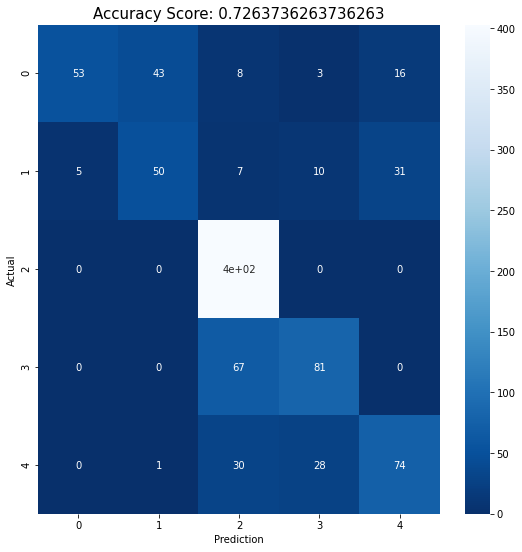

In [185]:
print_heatmap(cm, score)

In [187]:
print("Logistic Regression Classifier : ",score*100,"%")

Logistic Regression Classifier :  72.63736263736263 %


In [195]:
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1_score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))

Precision Score :  0.7263736263736263
Recall Score :  0.7263736263736263
f1_score :  0.7263736263736263


In [196]:
import pickle
filename = 'results_province_water.pkl'
pickle.dump(lor, open(filename, 'wb'))

## Logistic Regression

In [208]:
# LogisticRegression
eval_classifier.fit_and_predict_using_RandomSearchCV(LogisticRegression(), {
    'C': [0.5, 1.0, 1,5],
    'random_state': [rand_state_],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 150],
    'multi_class': ['auto'],
    'warm_start': [True]
})

{'train_score': 0.9995285242809995,
 'test_score': 0.9978021978021978,
 'estimator': LogisticRegression()}

## XGboost Classifier

In [225]:
# XGboost Classifier - Due to extreme gradient boosting - Taking lot of time - Not feasible

# xgb_grid_param = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [.1, .06, .03, .01],
#     'n_estimators': [80, 100, 120],
#     'booster': ['gbtree', 'gblinear', 'dart'],
#     'gamma': [0, 2, 4],
#     'random_state': [rand_state_]
# }

# eval_classifier.fit_and_predict_using_RandomSearchCV(XGBClassifier(), xgb_grid_param)

## Bagging Classifier

In [211]:
# Due to extreme gradient boosting - Taking lot of time - Not feasible

# BaggingClassifier
# eval_classifier.fit_and_predict_using_RandomSearchCV(BaggingClassifier(), {
#     'base_estimator': [dt_classifier, xgb_classifier],
#     'n_estimators': [10, 20, 30],
#     'random_state': [rand_state_],
#     'bootstrap': [True, False],
#     'bootstrap_features': [True, False]
# })

## AdaBoost Technique

In [214]:
# AdaBoostClassifier -Due to extreme gradient boosting - Taking lot of time - Not feasible

# dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=3, random_state=rand_state_, splitter='best')
# xgb_classifier = XGBClassifier(booster='dart', gamma=2, learning_rate=0.1, max_depth=3, n_estimators=100, random_state=rand_state_)

# eval_classifier.fit_and_predict_using_RandomSearchCV(AdaBoostClassifier(), {
#     'base_estimator': [dt_classifier, xgb_classifier],
#     'n_estimators': [50, 70, 90],
#     'random_state': [rand_state_],
#     'algorithm': ['SAMME', 'SAMME.R'],
#     'learning_rate': [0.8, 1.0, 1.3]
# })

## Gradient Boosting

In [215]:
# GradientBoostingClassifier - Overfit the model, not feasible

eval_classifier.fit_and_predict_using_RandomSearchCV(GradientBoostingClassifier(), {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [100, 120, 150],
    'random_state': [rand_state_],
    'min_samples_split': [2, 3, 4],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
})

{'train_score': 1.0,
 'test_score': 1.0,
 'estimator': GradientBoostingClassifier()}

## Voting Classifier

In [218]:
# Voting Classifier - not feasible
# voting_classifier = eval_classifier.voting_classifier(['RandomForestClassifier', 'AdaBoostClassifier'])
# voting_classifier

In [220]:
score_df = pd.DataFrame([{'ModelName': name, 'Test Score': props['test_score'], 'Training Score': props['train_score']} for name, props in eval_classifier.classifiers.items()])
score_df.set_index('ModelName')

# Advanced models are overfitting the results. 

,Test Score,Training Score
ModelName,,
DecisionTreeClassifier,0.514286,0.566242
RandomForestClassifier,0.906593,0.943894
KNeighborsClassifier,0.735165,1.000000
ExtraTreesClassifier,1.000000,1.000000
RidgeClassifier,0.769231,0.847242
LogisticRegression,0.997802,0.999529
GradientBoostingClassifier,1.000000,1.000000


In [226]:
import pickle
filename = 'results_province_water_modeling.pkl'
pickle.dump(eval_classifier, open(filename, 'wb'))

## Different Approach for Calculation for Decision Tree

In [228]:
from sklearn.tree import DecisionTreeClassifier

In [230]:
dtree = DecisionTreeClassifier(max_depth=10)
dtree

DecisionTreeClassifier(max_depth=10)

In [231]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [233]:
dtree_y_pred = dtree.predict(X_test)

In [234]:
dtree_accuracy_score = accuracy_score(y_test,dtree_y_pred)

dtree_accuracy_score

0.9989010989010989

In [237]:
cf_dtree = confusion_matrix(y_test, dtree_y_pred)
cf_dtree

array([[123,   0,   0,   0,   0],
       [  0, 103,   0,   0,   0],
       [  0,   0, 403,   0,   0],
       [  0,   0,   1, 147,   0],
       [  0,   0,   0,   0, 133]], dtype=int64)

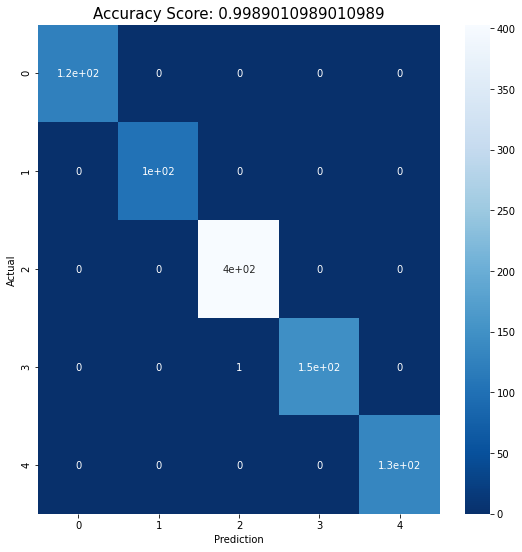

In [239]:
print_heatmap(cf_dtree,dtree_accuracy_score)

In [241]:
!pip install graphviz

In [243]:
from sklearn import tree

In [247]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None,filled=True, rounded=True,special_characters=True)

In [250]:
# As to restart the kernal, not executing the below 2 cells. This will show how the decision tree is formed. 

# conda install python-graphviz

In [249]:
# graph = graphviz.Source(dot_data) 

# graph

## Different Approach for Calculation for Random Forest

In [253]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 10,n_estimators = 100)

In [255]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [258]:
rf_y_pred = rf.predict(X_test)

In [260]:
rf_accuracy  = accuracy_score(y_test,rf_y_pred)

rf_accuracy

0.9978021978021978

In [263]:
rf_cm = confusion_matrix(y_test,rf_y_pred)

rf_cm

array([[123,   0,   0,   0,   0],
       [  0, 102,   0,   0,   1],
       [  0,   0, 403,   0,   0],
       [  0,   0,   0, 148,   0],
       [  0,   0,   0,   1, 132]], dtype=int64)

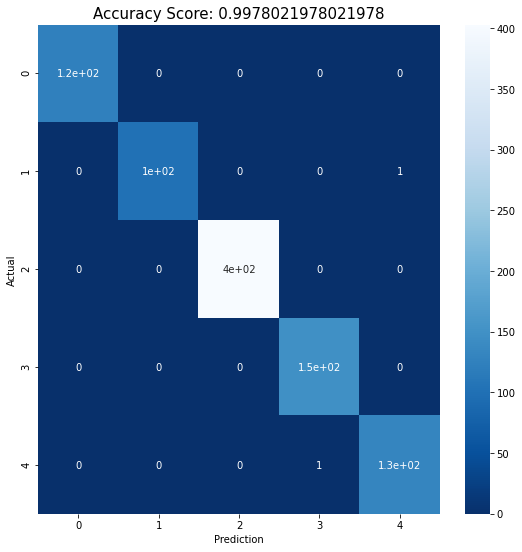

In [267]:
print_heatmap(rf_cm,rf_accuracy)